# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from pandas.io.json import json_normalize
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# get current date and format it correctly
current_date = date.today()
current_date = current_date.strftime("%m/%d/%Y")

01/07/2020


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# this block of code reads data from the api, checks to see if the city is real, and then saves its data to several lists

# url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# list for storing all json sets
weather_data = []

# iterables for print lines
i = 1
set_number = 1

# individual lists for data
city_list = []
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# loop through all randomly generated cities
for city in cities:
    # create query_url based on api key, city name, and set units to metric
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    # get response from api
    weather_response = requests.get(query_url)
    # convert json
    weather_json = weather_response.json()
    
    # check to see if the entry has a name, and if it does, save all its data
    try:
        weather_json["name"]
        weather_data.append(weather_json)
        city_list.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])

        print(f'Processing record {i} of Set {set_number} | {city}')
        
        # iterate record number and set number
        if i == 50:
            i = 1
            set_number = set_number + 1 
        else:
            i = i + 1
    # if no name is found, skip city and move on to the next one
    except:
        print("City not found.  Skipping...")
        
# once loop has finished, print notification
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


City not found.  Skipping...
Processing record 1 of Set 1 | bluff
City not found.  Skipping...
Processing record 2 of Set 1 | busselton
Processing record 3 of Set 1 | oranjemund
Processing record 4 of Set 1 | port macquarie
Processing record 5 of Set 1 | arraial do cabo
Processing record 6 of Set 1 | saint-leu
Processing record 7 of Set 1 | vila velha
City not found.  Skipping...
Processing record 8 of Set 1 | kutum
Processing record 9 of Set 1 | atuona
Processing record 10 of Set 1 | kavieng
Processing record 11 of Set 1 | najran
Processing record 12 of Set 1 | hasaki
Processing record 13 of Set 1 | torbay
Processing record 14 of Set 1 | kodiak
Processing record 15 of Set 1 | albany
Processing record 16 of Set 1 | hobart
City not found.  Skipping...
Processing record 17 of Set 1 | cape town
Processing record 18 of Set 1 | lompoc
Processing record 19 of Set 1 | barrow
Processing record 20 of Set 1 | melo
Processing record 21 of Set 1 | new norfolk
City not found.  Skipping...
Processin

Processing record 36 of Set 4 | myrtle beach
Processing record 37 of Set 4 | victoria
Processing record 38 of Set 4 | krasnyy yar
Processing record 39 of Set 4 | pokrovsk
Processing record 40 of Set 4 | birao
Processing record 41 of Set 4 | tuktoyaktuk
City not found.  Skipping...
Processing record 42 of Set 4 | los llanos de aridane
Processing record 43 of Set 4 | isangel
City not found.  Skipping...
Processing record 44 of Set 4 | el colomo
Processing record 45 of Set 4 | paamiut
Processing record 46 of Set 4 | diamantina
Processing record 47 of Set 4 | formosa do rio preto
Processing record 48 of Set 4 | butaritari
City not found.  Skipping...
Processing record 49 of Set 4 | bay roberts
Processing record 50 of Set 4 | bourail
Processing record 1 of Set 5 | sao joao da barra
Processing record 2 of Set 5 | mount gambier
Processing record 3 of Set 5 | saint george
Processing record 4 of Set 5 | khorol
Processing record 5 of Set 5 | faanui
City not found.  Skipping...
Processing record 

Processing record 23 of Set 8 | vila franca do campo
Processing record 24 of Set 8 | datong
Processing record 25 of Set 8 | sile
Processing record 26 of Set 8 | rey bouba
City not found.  Skipping...
Processing record 27 of Set 8 | mulchen
Processing record 28 of Set 8 | naifaru
Processing record 29 of Set 8 | san francisco
Processing record 30 of Set 8 | sambava
City not found.  Skipping...
Processing record 31 of Set 8 | henties bay
Processing record 32 of Set 8 | vanavara
Processing record 33 of Set 8 | conde
Processing record 34 of Set 8 | maine-soroa
Processing record 35 of Set 8 | greenville
City not found.  Skipping...
City not found.  Skipping...
City not found.  Skipping...
City not found.  Skipping...
Processing record 36 of Set 8 | bulgan
Processing record 37 of Set 8 | jalingo
Processing record 38 of Set 8 | lugovoy
City not found.  Skipping...
Processing record 39 of Set 8 | shenjiamen
Processing record 40 of Set 8 | calvia
Processing record 41 of Set 8 | waipawa
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# use lists generated in for loop to create data frame
weather_df = pd.DataFrame({"City":city_list,
                          "Cloudiness (%)":clouds,
                          "Country":country,
                          "Date":date,
                          "Humidity (%)":humidity,
                          "Latitude":latitude,
                          "Longitude":longitude,
                          "Max Temp (F)":max_temp,
                          "Wind Speed (mph)":wind_speed})

# save data frame to csv file without index
weather_df.to_csv(output_data_file,index=False)

# disply data frame
weather_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,Bluff,57,AU,1578441924,53,-23.58,149.07,81.88,10.76
1,Busselton,27,AU,1578441925,71,-33.64,115.35,72.00,1.01
2,Oranjemund,90,ZA,1578441925,79,-28.55,16.43,64.35,3.69
3,Port Macquarie,3,AU,1578441925,54,-31.43,152.91,97.00,8.05
4,Arraial do Cabo,20,BR,1578441925,83,-22.97,-42.02,80.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

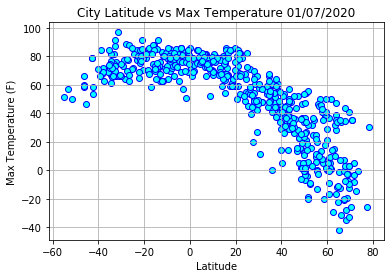

In [6]:
# create scatter plot of Latitude vs Max Temp
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Max Temp (F)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude") # x labels
plt.ylabel("Max Temperature (F)") # y labels
plt.title(f'City Latitude vs Max Temperature {current_date}') # graph title with current date
plt.savefig("LatVsTemp.png") # save figure
plt.show()

#### Latitude vs. Humidity Plot

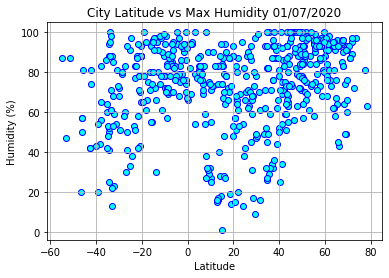

In [7]:
# create scatter plot of latitude vs humidity
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Humidity (%)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs Max Humidity {current_date}')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

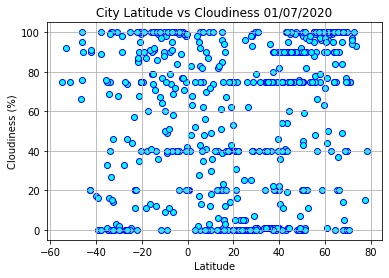

In [8]:
# create scatter plot of latitude vs cloudiness
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Cloudiness (%)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs Cloudiness {current_date}')
plt.savefig("LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

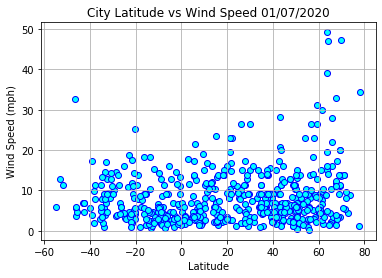

In [9]:
# create scatter plot of latitude vs wind speed
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Wind Speed (mph)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs Wind Speed {current_date}')
plt.savefig("LatVsWind.png")
plt.show()